<h2 align=center>Tumor Diagnosis (Part 1): Exploratory Data Analysis</h2>
<img src="https://storage.googleapis.com/kaggle-datasets-images/180/384/3da2510581f9d3b902307ff8d06fe327/dataset-cover.jpg">


### About the Dataset:

The [Breast Cancer Diagnostic data](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) is available on the UCI Machine Learning Repository. This database is also available through the [UW CS ftp server](http://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WDBC/).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of the cell nuclei present in the image.

**Attribute Information**:

- ID number
- Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter) 
2. texture (standard deviation of gray-scale values) 
3. perimeter 
4. area 
5. smoothness (local variation in radius lengths) 
6. compactness (perimeter^2 / area - 1.0) 
7. concavity (severity of concave portions of the contour) 
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

### Loading Libraries and Data

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time

# seaborn is a wrapper library around matplotlib

Mounted at /content/drive


In [ ]:
#data = pd.read_csv('data/data.csv')

data = pd.read_csv('/content/drive/My Drive/LinkedIn/Data Visualizations/Python/data/breast_cancer_diagnosis.csv')

<h2 align=center> Exploratory Data Analysis </h2>

---

### Separate Target from Features
Let's first seperate that target variable

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data['Unnamed: 32'].unique()

array([nan])

**Key Observations :**
- 'id' is unique for each row and doesn't help predict that target variable. It can be removed
- 'diagnosis' is the target variable
- The scale of of each feature is different. We need to standardize the dataset
- 'Unnamed:32 has only NaNs. It can be removed as it is not useful for analysis

In [ ]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
# y includes our target labels and x includes our features

y = data.diagnosis                          # M or B 

list = ['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )

x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Analyze Class Imbalance by plotting 'diagnosis' distributions
Class imbalance affects the predictive capabilities of ML algorithm. For an algorithm to predict accurately, it must be trained using balanced datasets. It the dataset is imbalanced, we can use techniques such as undersampling or oversampling or synthetic data to balance the training set. A good review of imbalanced datasets can be found [here](https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28)

Number of Benign:  357
Number of Malignant :  212


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


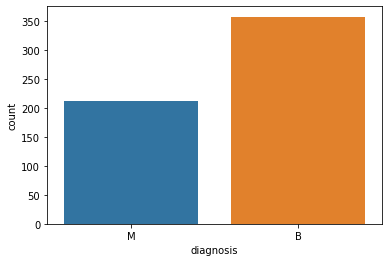

In [ ]:
ax = sns.countplot(y)
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

**Key Observation:** This distribution shows there is an imbalance. The data for 'Benign' class is higher than 'Malignant'. However the imbalance is not too high ti be concerned about.

In [ ]:
x.describe()

# gives summary stats of numerical features

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Key Observation:** The scaled of each feature is different. It has to be standardized if we are using linear regressors and for a few feature selection techniques such as PCA (observed from max, mean and std values)

In [ ]:
x.notnull().sum()

#count the number of non null values in each feature

radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64

**Key Observation :**There are no nulls in any feature. We do not have to worry about null values

<h2 align=center> Data Visualizations with seaborn to explore our datset further </h2>

---

### Visualizing Standardized Data with Seaborn

In [ ]:
# standardize the data

data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())  # this technique finds the z value of each data point

### Violin Chart
Important notes about Violin plot
- 50% of the data is available between the outer dotted lines. It is the entire inter quartile range
- The center dotted line is the median
- The shape helps us determine the skeweness in the data. A perfect symmetrical violin is normally distributed

For more information, [click here](https://www.google.com/search?q=hwo+to+interpret+violin+plot&rlz=1C1EJFC_enUS807US807&oq=hwo+to+interpret+violin+plot&aqs=chrome..69i57j0i13i457j0i13j0i22i30.5875j0j4&sourceid=chrome&ie=UTF-8#kpvalbx=_tDvvX_-mDcO05gLTxYagAQ19)

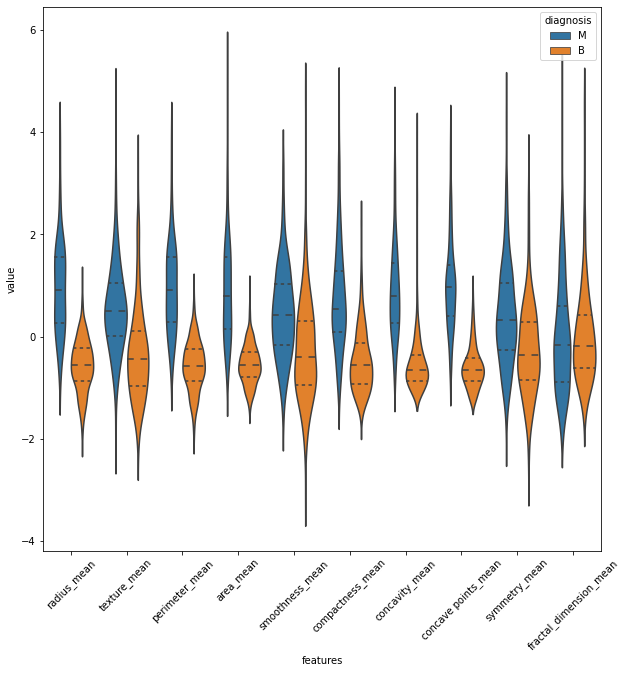

In [ ]:
# first ten features

data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')             # transposes the data


plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=False, inner="quart")
plt.xticks(rotation=45);

**Key Observations :**
- The medians of both classes in 'fractal_dimension_mean' feature is about the same. Ths feature may not be very helpful in predicting the classes.
- The data is improperly skewed for most of the features. We should normalize the data as well, depending on the model we use to predict
- Significant number of outliers present
 

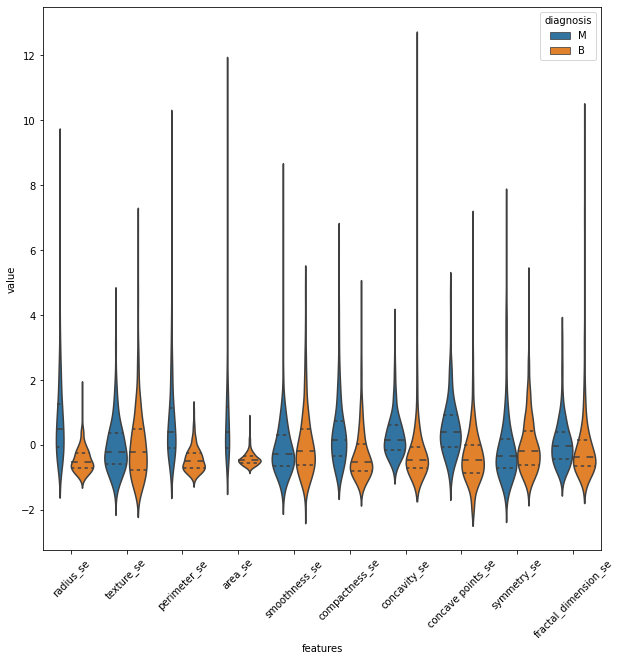

In [ ]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=False, inner="quart")
plt.xticks(rotation=45);

**Key Observations :**
- The medians of both classes in 'texture_se', 'smoothness_se' features are about the same. Ths feature may not be very helpful in predicting the classes.
- The data is skewed for most of the features. We should normalize the data, depending on the model we use to predict
- Significant number of outliers present

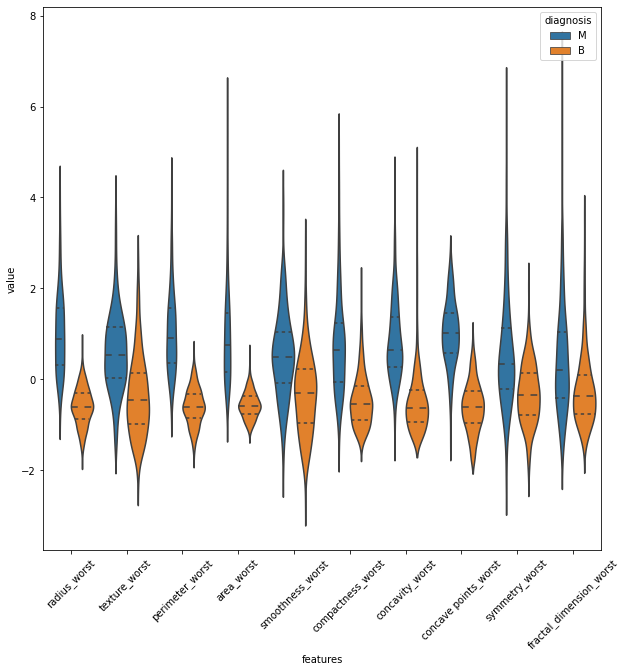

In [ ]:
# Third ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=False, inner="quart")
plt.xticks(rotation=45);

**Key Observations :**
- The data is skewed for most of the features. We should normalize the data, depending on the model we use to predict
- Significant number of outliers present

#### Box Plot
As an alternative of violin plot, box plots can be used. More [here](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

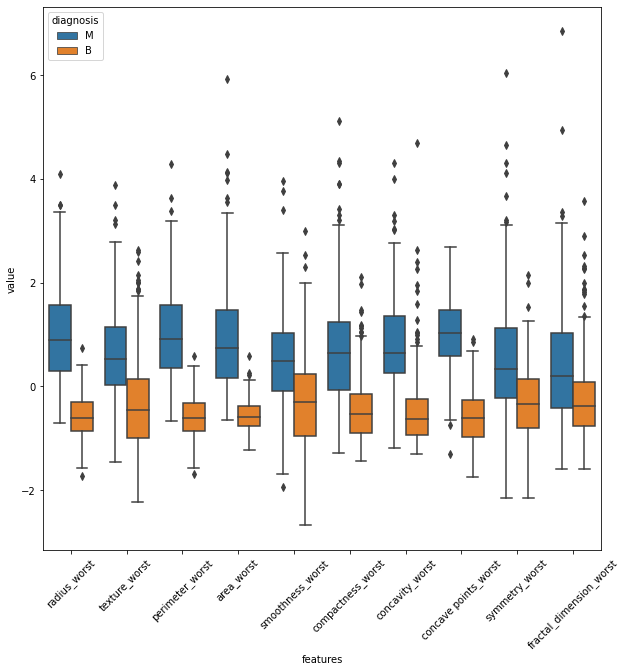

In [ ]:
# sample here
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=45);

### Feature Comparison
**Why is analyzing correlation between features important?**

If two independent features are highly correlated, we could use only one of them to predict the output class, both are not required.

#### Joint Plots
- Using Joint plot, we could study the correlation between two features.
- Joint plot also shows the distribution of each individual feature

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


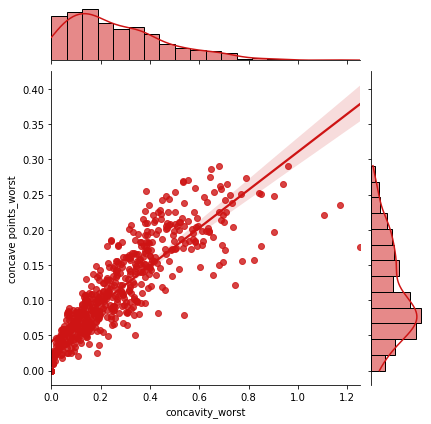

In [ ]:
sns.jointplot(x.loc[:,'concavity_worst'],
              x.loc[:,'concave points_worst'],
              kind="reg",
              color="#ce1414");

**Key Observation :**

But this task is tedious. We need to write a 'for loop' to create joint plots for each feature combination.

*An alternate solution is using 'Correlation Matrix' or 'Pair Plot'*

#### Correlation Matrix

In [ ]:
corrMatrix = x.corr()
print(corrMatrix)

# the output is a dataframe. We can easily write a condition to identify highly correlated features

                         radius_mean  ...  fractal_dimension_worst
radius_mean                 1.000000  ...                 0.007066
texture_mean                0.323782  ...                 0.119205
perimeter_mean              0.997855  ...                 0.051019
area_mean                   0.987357  ...                 0.003738
smoothness_mean             0.170581  ...                 0.499316
compactness_mean            0.506124  ...                 0.687382
concavity_mean              0.676764  ...                 0.514930
concave points_mean         0.822529  ...                 0.368661
symmetry_mean               0.147741  ...                 0.438413
fractal_dimension_mean     -0.311631  ...                 0.767297
radius_se                   0.679090  ...                 0.049559
texture_se                 -0.097317  ...                -0.045655
perimeter_se                0.674172  ...                 0.085433
area_se                     0.735864  ...                 0.01

#### Pair Plots
- Generating just for a few features because it could get messy drawing 30 by 30 charts. 30 is the total number of features

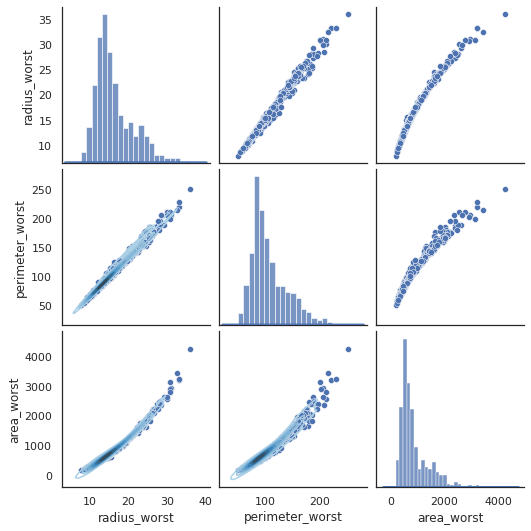

In [ ]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.pairplot(df)
#g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

### Heatmap using pairwise correlations
- You could use the correlation matrix generated above to create a heatmap

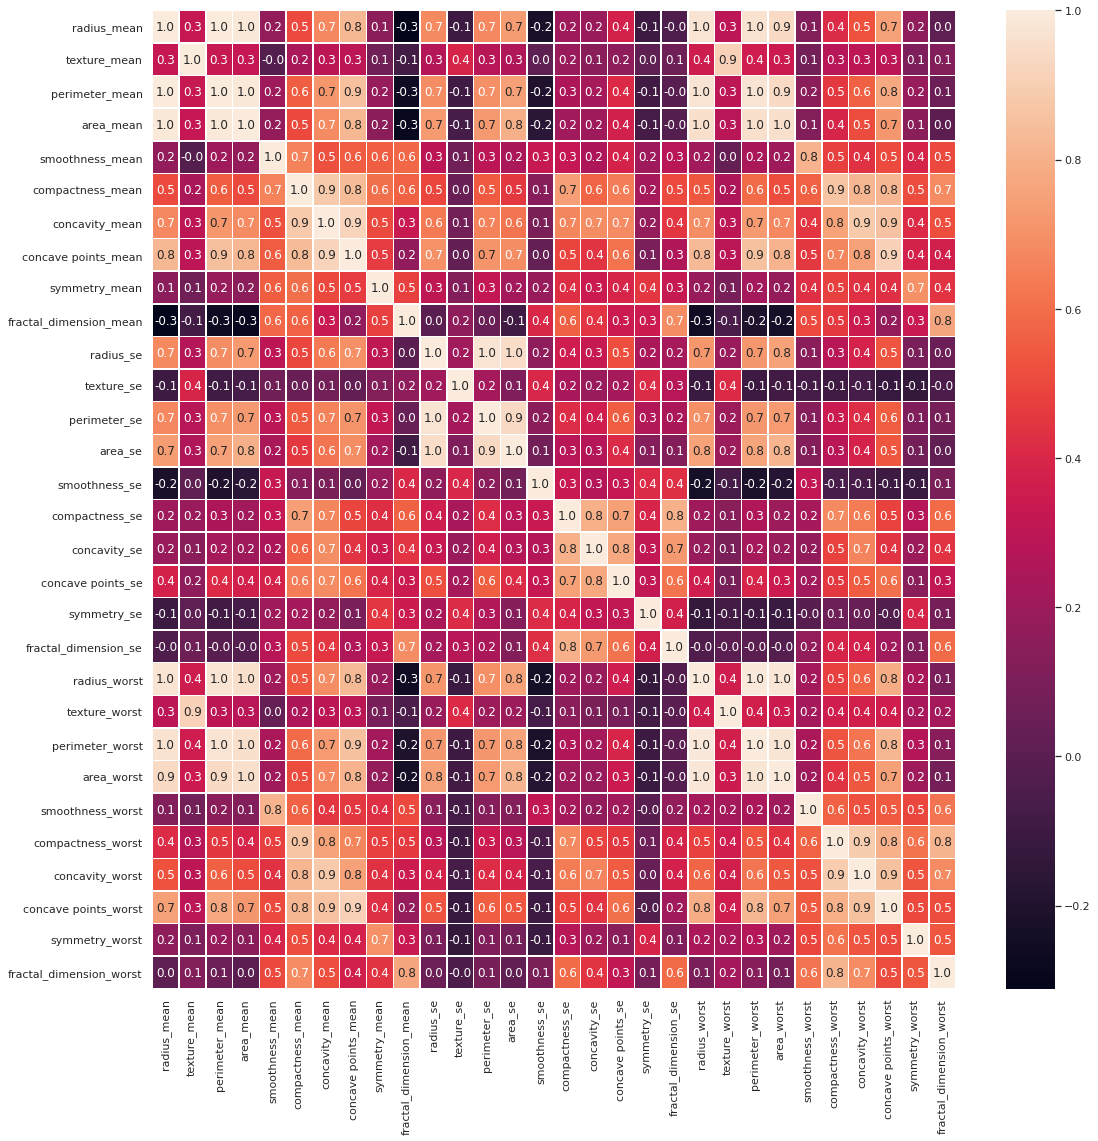

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

**Key Observations:**
- The diagonal values are always 1, because it pairs each feature against itself.
- There are feature pairs whose correlation is equal to 1. One of those features can be ignored because it is not beneficial having both features in our prediction model

<h2 align=center> Classification using XGBoost </h2>

**Goal:** Study the affect of different feature selection techniques on model predictability

For more information regarding XGBoost, look [here](https://towardsdatascience.com/a-beginners-guide-to-xgboost-87f5d4c30ed7)


---












**Technique 1:** Using the above heatmap, let me first drop one among the each highly correlated features pair

In [ ]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean',
              'concave points_mean','radius_se','perimeter_se',
              'radius_worst','perimeter_worst','compactness_worst',
              'concave points_worst','compactness_se','concave points_se',
              'texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


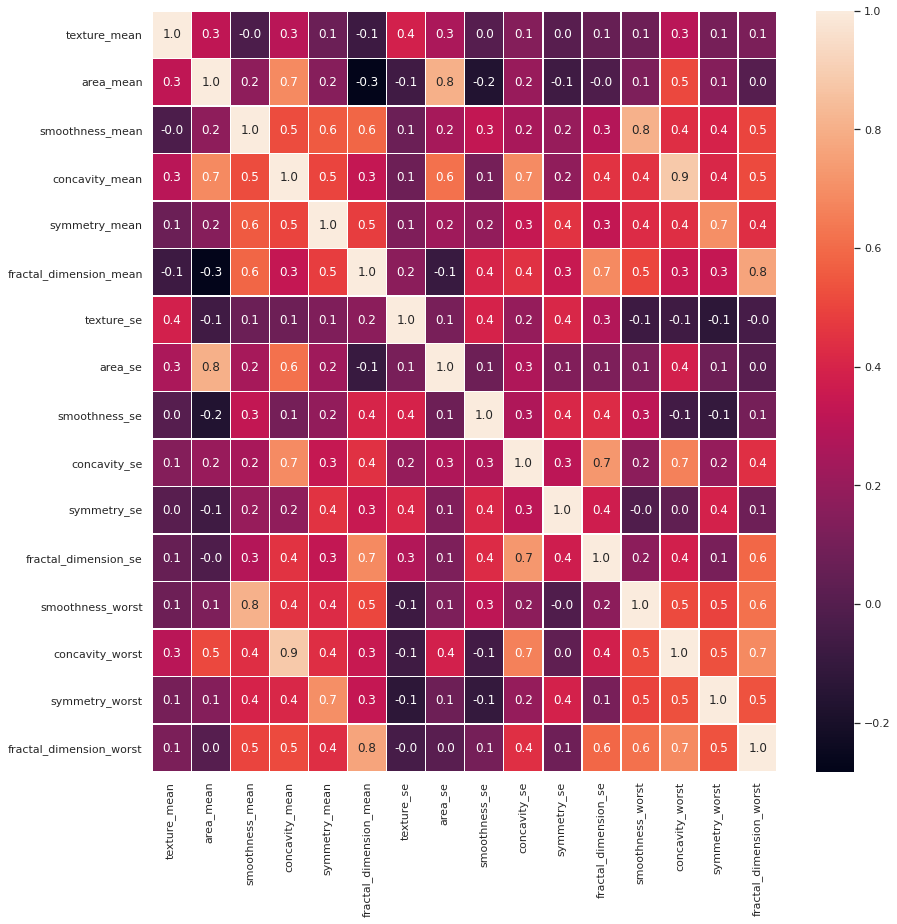

In [ ]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

###Import releavant libraries

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# splitting data into train test split

x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

Accuracy is:  0.9766081871345029


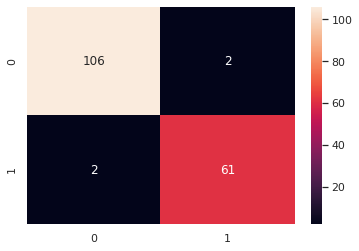

In [ ]:
# running XGB CLassifier on remaining feature after the initial drop

clf_rf = xgb.XGBClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)
y_predict = clf_rf.predict(x_test)

ac = accuracy_score(y_test, y_predict)
print('Accuracy is: ',ac)

cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt="d");

**Key Observations:**
- The model is highly accurate on this data. However in real world with more dimensionaluty and finer data points, this won't be the case.
- Since this model predicts breast cancers, ' False Negative' erros are more riskier than 'False Positive' errors.

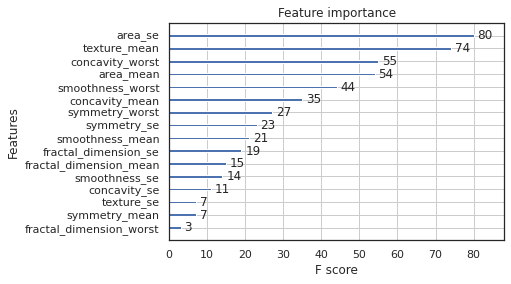

In [ ]:
from xgboost import plot_importance
plot_importance(clf_rf, );

**Technique 2:** Univariate feature selection

Univariate feature selection works by selecting the best features based on univariate statistical tests. We compare each feature to the target variable, to see whether there is any statistically significant relationship between them. It is also called analysis of variance (ANOVA). When we analyze the relationship between one feature and the target variable, we ignore the other features. That is why it is called ‘univariate’. Each feature has its test score. Finally, all the test scores are compared, and the features with top scores will be selected.

Good [article](https://towardsdatascience.com/feature-selection-using-python-for-classification-problem-b5f00a1c7028) to understand different feature selection techniques.

Chi-square test measures dependence between stochastic variables, so using this function “weeds out” the features that are the most likely to be independent of class and therefore irrelevant for classification. Use it only if the features have non negative values, and for classification tasks

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

select_feature = SelectKBest(chi2, k=10).fit(x_train, y_train)

print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.66899557e+04 1.00015175e-01 1.30547650e+01
 1.95982847e-01 3.42575072e-04 4.07131026e-02 6.12741067e+03
 1.32470372e-03 6.92896719e-01 1.39557806e-03 2.65927071e-03
 2.63226314e-01 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


Accuracy is:  0.9707602339181286


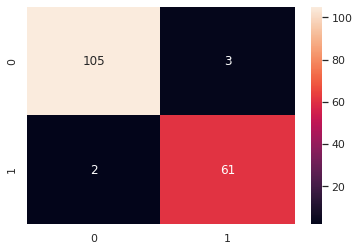

In [ ]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)

clf_rf_2 = xgb.XGBClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)

ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d");

**Technique 3**: Recursive Feature Elimination with Cross validation

In [ ]:
from sklearn.feature_selection import RFECV

clf_rf_4 = xgb.XGBClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   
rfecv = rfecv.fit(x_train, y_train)
ac_3 = accuracy_score(y_test,rfecv.predict(x_test))

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])
print('Accuracy is: ',ac_3)

Optimal number of features : 16
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'texture_se', 'area_se',
       'smoothness_se', 'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')
Accuracy is:  0.9766081871345029


**Key Observation:**

The results suggests that 16 features are required to get the best possible accuracy by the model

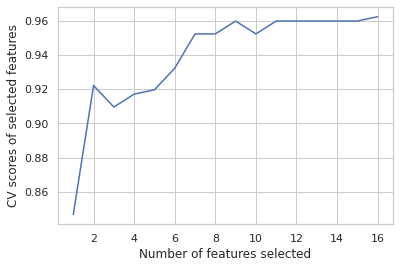

In [ ]:
# Plot number of features VS. cross-validation scores
num_features = [i for i in range(1, len(rfecv.grid_scores_) + 1)]
cv_scores = rfecv.grid_scores_

sns.set(style="whitegrid")
ax = sns.lineplot(x=num_features, y=cv_scores)
ax.set(xlabel="Number of features selected", ylabel="CV scores of selected features");

**Technique 4:** Principal component analysis

Be sure to standardize the data. In our data analysis step, we notices that the scaled of these features is different.

The best explanation can be found [here](https://www.youtube.com/watch?v=OFyyWcw2cyM&list=PLP6RYS1pwbHr4UMk7jyaltJgd49gyF2aS&index=3) and [here](https://builtin.com/data-science/step-step-explanation-principal-component-analysis). I couln't find a better resource

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

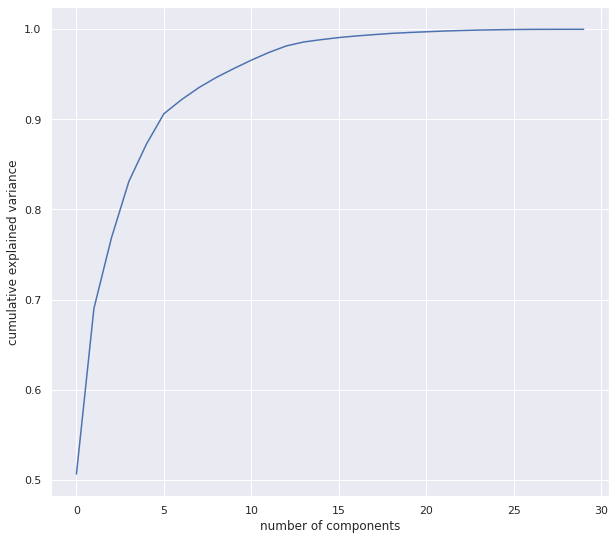

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

sns.set()
plt.figure(1, figsize=(10, 9))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');



In [ ]:
#converts 30 features into 2 features. It basically compresses keeping knowledge from all 30 features in these 2 features
#This is a feature reduction technique
pca_2 = PCA(n_components=2)    
pca_2.fit(x_train_N)

x_pca = pca_2.transform(x_train_N)
# after this step you can apply any ML algorithm. 
# Reducing the dimensionality to 2 features here is the key. You can set it to any number you want.
# run through a few values to find the best value for this parameter

Text(0, 0.5, 'Second principal component')

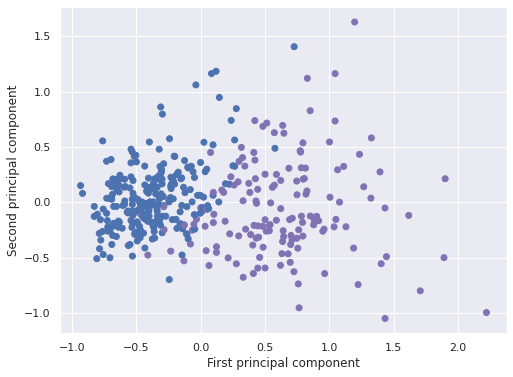

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_train, cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')